# División de Datos en Machine Learning
## Entrenamiento, Validación y Prueba

**Objetivo**: Entender de forma profunda por qué dividimos nuestros datos y cómo hacerlo correctamente.

---

## 📚 Índice
1. ¿Qué es la división de datos y por qué existe?
2. Los tres conjuntos: entrenamiento, validación y prueba
3. Conexión con EDA (Exploratory Data Analysis)
4. Ejemplos prácticos: de simple a complejo
5. Casos especiales y mejores prácticas
6. Errores comunes y cómo evitarlos

---
## 1. ¿Qué es la división de datos y por qué existe?

### La pregunta fundamental

Imagina que estás preparando un examen de matemáticas. Si el profesor te da 100 problemas para practicar y luego en el examen te pone **exactamente los mismos 100 problemas**, ¿realmente sabes matemáticas o solo memorizaste las respuestas?

Este es exactamente el problema que resolvemos con la división de datos.

### El problema del sobreajuste (overfitting)

Cuando un modelo de Machine Learning ve los mismos datos una y otra vez durante el entrenamiento, puede simplemente memorizar las respuestas en lugar de aprender los patrones generales. Esto se llama **sobreajuste** u **overfitting**.

**Un ejemplo del mundo real**: Imagina que le enseñas a un niño a identificar perros mostrándole solo fotos de tu Golden Retriever. El niño memorizará que "perro = animal dorado de pelo largo". Cuando vea un Chihuahua, no lo reconocerá como perro. El niño se "sobreajustó" a tus ejemplos específicos.

### La solución

Dividimos nuestros datos para crear diferentes "roles":
- Datos que el modelo usa para aprender (entrenamiento)
- Datos que usamos para ajustar y mejorar el modelo (validación)
- Datos que usamos solo al final para evaluar qué tan bien funciona realmente (prueba)

De esta forma, podemos saber si nuestro modelo realmente aprendió o solo memorizó.

In [1]:
# Primero, importamos las librerías que necesitaremos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, load_iris, load_diabetes
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report

# Configuración para gráficos más bonitos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Para reproducibilidad - esto asegura que obtenemos los mismos resultados cada vez
np.random.seed(42)

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


---
## 2. Los tres conjuntos: Entrenamiento, Validación y Prueba

### 🎯 Conjunto de Entrenamiento (Training Set)

**¿Qué es?**: Son los datos que el modelo usa directamente para aprender. Aquí el modelo ajusta sus parámetros internos (pesos, sesgos, etc.) para minimizar el error.

**Analogía**: Es como tu libro de texto y apuntes. Los lees, estudias, aprendes de ellos.

**Porcentaje típico**: 60-80% de los datos totales.

**¿Cuántas veces se usa?**: Muchas veces. El modelo pasa por estos datos múltiples veces (épocas) durante el entrenamiento.

### 🔍 Conjunto de Validación (Validation Set)

**¿Qué es?**: Son datos que NO se usan para entrenar, pero SÍ para tomar decisiones sobre el modelo. Aquí probamos diferentes configuraciones (hiperparámetros) y elegimos cuál funciona mejor.

**Analogía**: Son como exámenes de práctica que haces mientras estudias. Te ayudan a decidir si debes estudiar más, cambiar tu método de estudio, o si ya estás listo.

**Porcentaje típico**: 10-20% de los datos totales.

**¿Cuántas veces se usa?**: Muchas veces durante el desarrollo. Cada vez que ajustamos algo del modelo, lo evaluamos con validación.

**Decisiones que tomamos con validación**:
- ¿Detenemos el entrenamiento? (early stopping)
- ¿Qué hiperparámetros funcionan mejor?
- ¿El modelo está sobreajustando?
- ¿Necesitamos más datos o características?

### ✅ Conjunto de Prueba (Test Set)

**¿Qué es?**: Son datos completamente nuevos que el modelo nunca ha visto, ni directa ni indirectamente. Solo los usamos UNA VEZ al final para reportar el rendimiento real del modelo.

**Analogía**: Es el examen final oficial. Solo lo haces una vez, no ves las preguntas antes, y tu calificación es la que cuenta.

**Porcentaje típico**: 10-20% de los datos totales.

**¿Cuántas veces se usa?**: UNA SOLA VEZ, al final del proyecto.

**¡REGLA DE ORO!**: Los datos de prueba son sagrados. NO los uses para tomar ninguna decisión sobre el modelo. Si empiezas a ajustar cosas basándote en el conjunto de prueba, ya no es una evaluación imparcial.

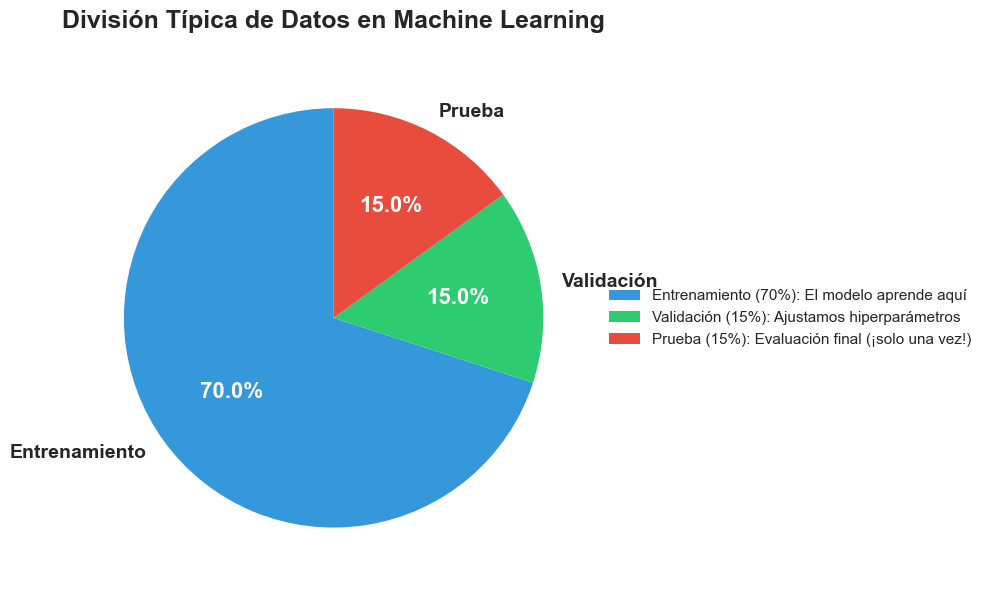


RESUMEN DE LA DIVISIÓN
Si tienes 1000 datos:
  🎯 Entrenamiento: 700 datos (70%)
  🔍 Validación: 150 datos (15%)
  ✅ Prueba: 150 datos (15%)


In [2]:
# Visualización de la división de datos
def visualizar_division_datos(train_size=0.7, val_size=0.15, test_size=0.15):
    """
    Esta función crea una visualización clara de cómo se dividen los datos.
    
    Parámetros:
    - train_size: proporción para entrenamiento (default 70%)
    - val_size: proporción para validación (default 15%)
    - test_size: proporción para prueba (default 15%)
    """
    
    # Verificamos que las proporciones sumen 1 (100%)
    total = train_size + val_size + test_size
    if not np.isclose(total, 1.0):
        print(f"⚠️ Advertencia: Las proporciones suman {total}, no 1.0")
    
    # Creamos la visualización
    fig, ax = plt.subplots(figsize=(14, 6))
    
    # Colores para cada conjunto
    colors = ['#3498db', '#2ecc71', '#e74c3c']
    labels = ['Entrenamiento', 'Validación', 'Prueba']
    sizes = [train_size, val_size, test_size]
    
    # Gráfico de pastel
    wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
                                        startangle=90, textprops={'size': 14, 'weight': 'bold'})
    
    # Hacemos los porcentajes más legibles
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(16)
    
    ax.set_title('División Típica de Datos en Machine Learning', fontsize=18, weight='bold', pad=20)
    
    # Agregamos una leyenda con explicaciones
    legend_labels = [
        f'Entrenamiento ({train_size*100:.0f}%): El modelo aprende aquí',
        f'Validación ({val_size*100:.0f}%): Ajustamos hiperparámetros',
        f'Prueba ({test_size*100:.0f}%): Evaluación final (¡solo una vez!)'
    ]
    ax.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=11)
    
    plt.tight_layout()
    plt.show()
    
    # Mostramos un resumen en texto
    print("\n" + "="*60)
    print("RESUMEN DE LA DIVISIÓN")
    print("="*60)
    print(f"Si tienes 1000 datos:")
    print(f"  🎯 Entrenamiento: {int(1000*train_size)} datos ({train_size*100:.0f}%)")
    print(f"  🔍 Validación: {int(1000*val_size)} datos ({val_size*100:.0f}%)")
    print(f"  ✅ Prueba: {int(1000*test_size)} datos ({test_size*100:.0f}%)")
    print("="*60)

# Ejecutamos la visualización
visualizar_division_datos()

---
## 3. Conexión con EDA (Exploratory Data Analysis)

### ¿Cuándo hacer EDA en relación con la división de datos?

Esta es una pregunta que confunde a muchos, así que vamos a aclararlo paso a paso.

### El flujo correcto:

**PASO 1: EDA Inicial - ANTES de dividir**

Primero hacemos un análisis exploratorio completo de TODOS nuestros datos juntos. Aquí buscamos entender:
- ¿Qué tipo de datos tenemos?
- ¿Hay valores faltantes?
- ¿Cuál es la distribución de las variables?
- ¿Hay outliers o anomalías?
- ¿Las clases están balanceadas?
- ¿Hay correlaciones interesantes?

Este EDA inicial nos ayuda a entender qué tenemos entre manos y a tomar decisiones informadas sobre cómo dividir los datos.

**PASO 2: División de datos**

Basándonos en lo que aprendimos en el EDA, dividimos los datos. Por ejemplo, si descubrimos que tenemos clases muy desbalanceadas, usaremos división estratificada.

**PASO 3: EDA del conjunto de entrenamiento - DESPUÉS de dividir**

Una vez divididos los datos, hacemos EDA adicional SOLO en el conjunto de entrenamiento para:
- Decidir qué transformaciones aplicar
- Crear nuevas características (feature engineering)
- Detectar y manejar outliers

**¿Por qué solo en entrenamiento?** Porque si miramos validación o prueba para tomar estas decisiones, estamos "filtrando información" de esos conjuntos hacia nuestro modelo, lo que contamina la evaluación.

### ⚠️ Error común: Data Leakage

**Data leakage** (fuga de datos) ocurre cuando información de validación o prueba "se filtra" hacia el entrenamiento. Esto es muy peligroso porque:
- Tu modelo parece funcionar muy bien en validación
- Pero cuando lo llevas al mundo real, falla miserablemente
- Has estado entrenando con información del futuro

**Ejemplo de data leakage**:
```python
# ❌ INCORRECTO - Normalizar ANTES de dividir
X_normalized = (X - X.mean()) / X.std()  # Usamos información de TODO el dataset
X_train, X_test = train_test_split(X_normalized)  # Ahora test tiene info de train

# ✅ CORRECTO - Normalizar DESPUÉS de dividir
X_train, X_test = train_test_split(X)
mean_train = X_train.mean()  # Solo calculamos con datos de entrenamiento
std_train = X_train.std()
X_train_normalized = (X_train - mean_train) / std_train
X_test_normalized = (X_test - mean_train) / std_train  # Usamos las estadísticas de train
```

🌸 Dataset Iris cargado
Forma del dataset: (150, 6)

Primeras filas:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa



EDA INICIAL - Análisis completo del dataset

📊 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
 5   species_name       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

📈 Estadísticas descriptivas:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000



🎯 Distribución de especies:
species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

¿Las clases están balanceadas? True


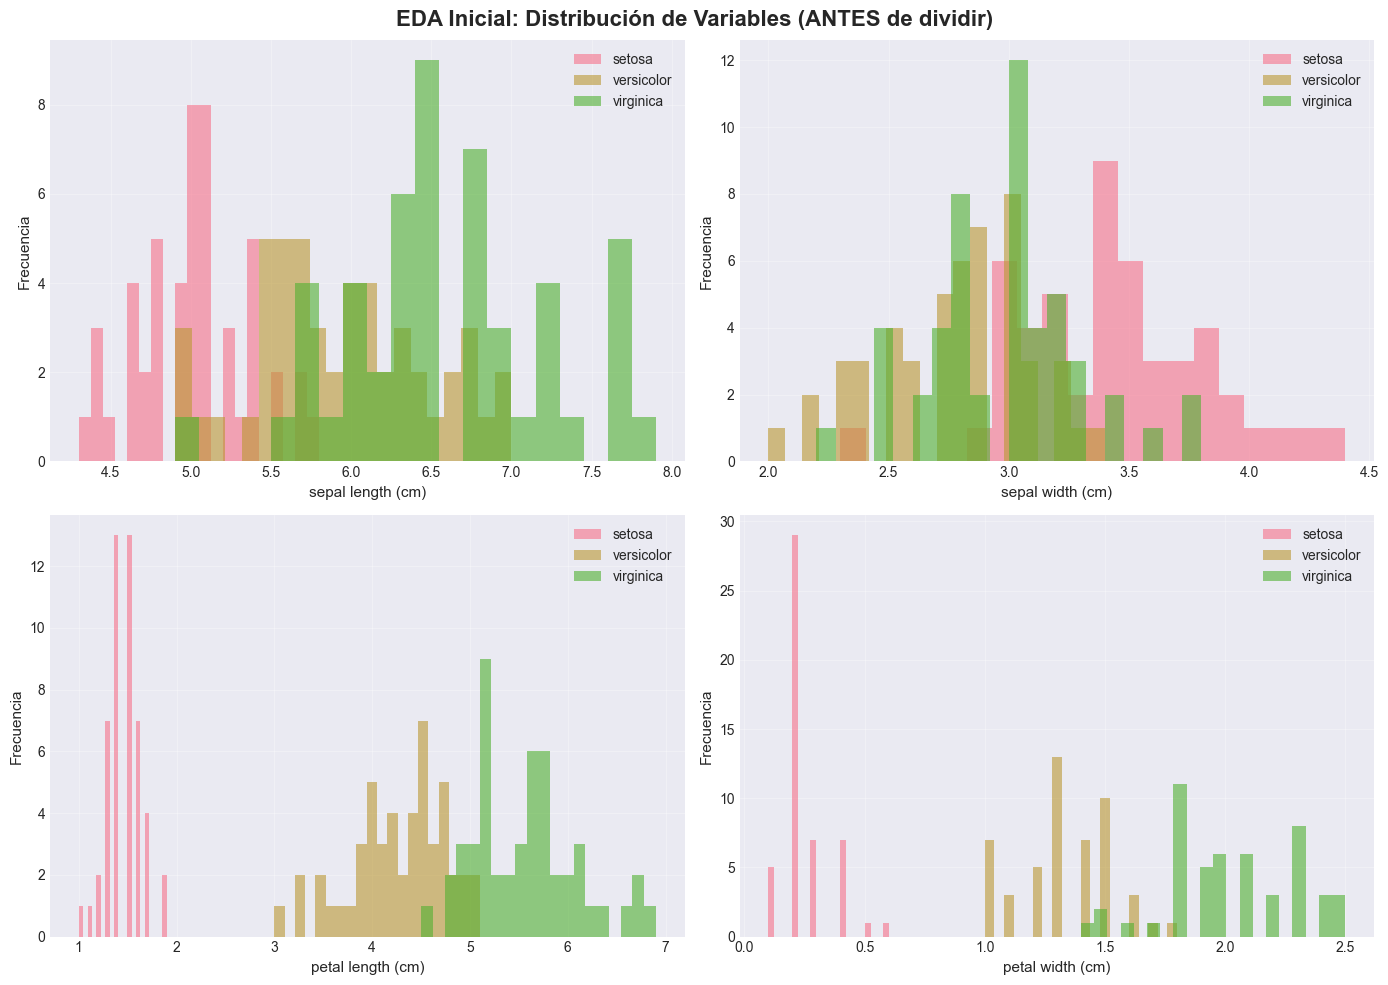


✅ EDA inicial completado. Ahora podemos dividir los datos de forma informada.


In [3]:
# Ejemplo de EDA antes de dividir datos
# Vamos a usar el dataset Iris que es perfecto para enseñar

# Cargamos el dataset
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['species'] = iris.target
df_iris['species_name'] = df_iris['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("🌸 Dataset Iris cargado")
print(f"Forma del dataset: {df_iris.shape}")
print(f"\nPrimeras filas:")
display(df_iris.head())

# EDA Inicial - ANTES de dividir
print("\n" + "="*60)
print("EDA INICIAL - Análisis completo del dataset")
print("="*60)

# 1. Información básica
print("\n📊 Información del dataset:")
print(df_iris.info())

# 2. Estadísticas descriptivas
print("\n📈 Estadísticas descriptivas:")
display(df_iris.describe())

# 3. Distribución de clases
print("\n🎯 Distribución de especies:")
print(df_iris['species_name'].value_counts())
print(f"\n¿Las clases están balanceadas? {df_iris['species_name'].value_counts().std() < 1}")

# 4. Visualización de la distribución
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('EDA Inicial: Distribución de Variables (ANTES de dividir)', fontsize=16, weight='bold')

for idx, column in enumerate(iris.feature_names):
    ax = axes[idx // 2, idx % 2]
    for species in df_iris['species_name'].unique():
        data = df_iris[df_iris['species_name'] == species][column]
        ax.hist(data, alpha=0.6, label=species, bins=20)
    ax.set_xlabel(column, fontsize=11)
    ax.set_ylabel('Frecuencia', fontsize=11)
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ EDA inicial completado. Ahora podemos dividir los datos de forma informada.")

---
## 4. Ejemplos Prácticos: De Simple a Complejo

Vamos a ver varios ejemplos que aumentan en complejidad. Cada ejemplo te enseñará algo nuevo.

### 📝 Ejemplo 1: División Básica (80-20)

El ejemplo más simple: dividir en entrenamiento y prueba solamente. Esto se usa cuando:
- Tienes muchos datos
- No necesitas ajustar hiperparámetros complejos
- Quieres algo rápido y simple

Aunque no es lo ideal para proyectos reales (porque nos falta validación), es útil para entender el concepto básico.

In [4]:
print("="*60)
print("EJEMPLO 1: División Básica 80-20")
print("="*60)

# Preparamos los datos
X = df_iris.drop(['species', 'species_name'], axis=1)  # Características
y = df_iris['species']  # Etiquetas

print(f"\nDatos originales: {X.shape[0]} muestras")

# División simple: 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,  # 20% para prueba
    random_state=42  # Para reproducibilidad
)

print(f"\nDespués de la división:")
print(f"  🎯 Entrenamiento: {X_train.shape[0]} muestras ({X_train.shape[0]/X.shape[0]*100:.1f}%)")
print(f"  ✅ Prueba: {X_test.shape[0]} muestras ({X_test.shape[0]/X.shape[0]*100:.1f}%)")

# Entrenamos un modelo simple
modelo_simple = LogisticRegression(max_iter=200)
modelo_simple.fit(X_train, y_train)

# Evaluamos
train_accuracy = modelo_simple.score(X_train, y_train)
test_accuracy = modelo_simple.score(X_test, y_test)

print(f"\n📊 Resultados:")
print(f"  Precisión en entrenamiento: {train_accuracy*100:.2f}%")
print(f"  Precisión en prueba: {test_accuracy*100:.2f}%")
print(f"  Diferencia: {abs(train_accuracy - test_accuracy)*100:.2f}%")

if abs(train_accuracy - test_accuracy) < 0.05:
    print("\n✅ El modelo generaliza bien (diferencia < 5%)")
else:
    print("\n⚠️ Hay diferencia significativa entre train y test")

EJEMPLO 1: División Básica 80-20

Datos originales: 150 muestras

Después de la división:
  🎯 Entrenamiento: 120 muestras (80.0%)
  ✅ Prueba: 30 muestras (20.0%)

📊 Resultados:
  Precisión en entrenamiento: 97.50%
  Precisión en prueba: 100.00%
  Diferencia: 2.50%

✅ El modelo generaliza bien (diferencia < 5%)


### 📝 Ejemplo 2: División Completa con Validación (70-15-15)

Este es el enfoque profesional y recomendado. Creamos tres conjuntos separados:
- 70% para entrenar
- 15% para validar mientras ajustamos
- 15% para la evaluación final

Aquí vamos a ver cómo la validación nos ayuda a tomar decisiones sobre el modelo.

In [5]:
print("="*60)
print("EJEMPLO 2: División Completa con Validación (70-15-15)")
print("="*60)

# Primera división: separamos los datos de prueba
# Esto es importante: primero separamos test y NO lo volvemos a tocar
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.15,  # 15% para prueba
    random_state=42
)

print(f"\nPrimera división (separar test):")
print(f"  Datos temporales: {X_temp.shape[0]} muestras (85%)")
print(f"  Datos de prueba: {X_test.shape[0]} muestras (15%)")
print(f"  ⚠️ Los datos de prueba quedan guardados y NO se tocan hasta el final")

# Segunda división: del resto, separamos train y validación
# Queremos aproximadamente 70% del total para train y 15% para validación
# Como ya tenemos 85%, hacemos: 70/85 ≈ 0.82 para train
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.176,  # 15/85 ≈ 0.176 para obtener 15% del total
    random_state=42
)

print(f"\nSegunda división (separar validación):")
print(f"  🎯 Entrenamiento: {X_train.shape[0]} muestras ({X_train.shape[0]/X.shape[0]*100:.1f}%)")
print(f"  🔍 Validación: {X_val.shape[0]} muestras ({X_val.shape[0]/X.shape[0]*100:.1f}%)")
print(f"  ✅ Prueba: {X_test.shape[0]} muestras ({X_test.shape[0]/X.shape[0]*100:.1f}%)")

# Ahora vamos a probar diferentes configuraciones usando validación
print("\n" + "="*60)
print("PROBANDO DIFERENTES MODELOS CON VALIDACIÓN")
print("="*60)

# Probamos diferentes profundidades de árbol de decisión
profundidades = [1, 3, 5, 10, 20]
resultados_val = []

for depth in profundidades:
    # Entrenamos el modelo
    modelo = DecisionTreeClassifier(max_depth=depth, random_state=42)
    modelo.fit(X_train, y_train)
    
    # Evaluamos en entrenamiento y validación
    train_acc = modelo.score(X_train, y_train)
    val_acc = modelo.score(X_val, y_val)
    
    resultados_val.append({
        'profundidad': depth,
        'train_accuracy': train_acc,
        'val_accuracy': val_acc,
        'diferencia': train_acc - val_acc
    })
    
    print(f"\nProfundidad {depth:2d}: Train={train_acc:.3f}, Val={val_acc:.3f}, Diff={train_acc-val_acc:.3f}")

# Convertimos a DataFrame para análisis
df_resultados = pd.DataFrame(resultados_val)

# Encontramos el mejor modelo según validación
mejor_idx = df_resultados['val_accuracy'].idxmax()
mejor_depth = df_resultados.loc[mejor_idx, 'profundidad']

print(f"\n{'='*60}")
print(f"🏆 MEJOR MODELO: Profundidad = {mejor_depth}")
print(f"{'='*60}")

# Ahora entrenamos el mejor modelo en train+validación
# (Esto es opcional pero recomendado para usar todos los datos disponibles)
X_train_full = pd.concat([X_train, X_val])
y_train_full = pd.concat([y_train, y_val])

modelo_final = DecisionTreeClassifier(max_depth=int(mejor_depth), random_state=42)
modelo_final.fit(X_train_full, y_train_full)

# AHORA SÍ, evaluamos en test (solo una vez)
test_accuracy = modelo_final.score(X_test, y_test)

print(f"\n✅ EVALUACIÓN FINAL EN TEST:")
print(f"  Precisión en prueba: {test_accuracy*100:.2f}%")
print(f"\n💡 Este es el número que reportaríamos como el rendimiento real del modelo.")

EJEMPLO 2: División Completa con Validación (70-15-15)

Primera división (separar test):
  Datos temporales: 127 muestras (85%)
  Datos de prueba: 23 muestras (15%)
  ⚠️ Los datos de prueba quedan guardados y NO se tocan hasta el final

Segunda división (separar validación):
  🎯 Entrenamiento: 104 muestras (69.3%)
  🔍 Validación: 23 muestras (15.3%)
  ✅ Prueba: 23 muestras (15.3%)

PROBANDO DIFERENTES MODELOS CON VALIDACIÓN

Profundidad  1: Train=0.673, Val=0.696, Diff=-0.023

Profundidad  3: Train=0.962, Val=0.957, Diff=0.005

Profundidad  5: Train=0.990, Val=0.957, Diff=0.034

Profundidad 10: Train=1.000, Val=0.957, Diff=0.043

Profundidad 20: Train=1.000, Val=0.957, Diff=0.043

🏆 MEJOR MODELO: Profundidad = 3

✅ EVALUACIÓN FINAL EN TEST:
  Precisión en prueba: 100.00%

💡 Este es el número que reportaríamos como el rendimiento real del modelo.


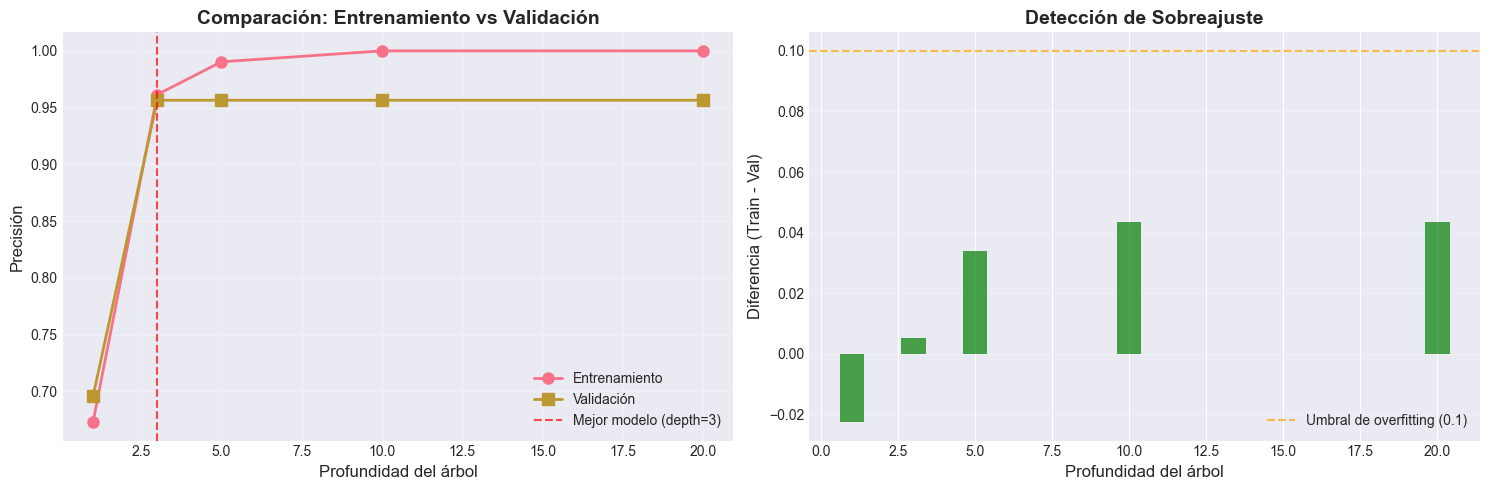


📊 Interpretación:
  - Verde: Buen balance, el modelo generaliza bien
  - Rojo: Posible overfitting, el modelo memoriza los datos de entrenamiento


In [6]:
# Visualización de los resultados de validación
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico 1: Precisión vs Profundidad
ax1.plot(df_resultados['profundidad'], df_resultados['train_accuracy'], 
         marker='o', label='Entrenamiento', linewidth=2, markersize=8)
ax1.plot(df_resultados['profundidad'], df_resultados['val_accuracy'], 
         marker='s', label='Validación', linewidth=2, markersize=8)
ax1.axvline(x=mejor_depth, color='red', linestyle='--', alpha=0.7, 
            label=f'Mejor modelo (depth={mejor_depth})')
ax1.set_xlabel('Profundidad del árbol', fontsize=12)
ax1.set_ylabel('Precisión', fontsize=12)
ax1.set_title('Comparación: Entrenamiento vs Validación', fontsize=14, weight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Gráfico 2: Diferencia (señal de overfitting)
ax2.bar(df_resultados['profundidad'], df_resultados['diferencia'], 
        color=['red' if d > 0.1 else 'green' for d in df_resultados['diferencia']], alpha=0.7)
ax2.axhline(y=0.1, color='orange', linestyle='--', alpha=0.7, 
            label='Umbral de overfitting (0.1)')
ax2.set_xlabel('Profundidad del árbol', fontsize=12)
ax2.set_ylabel('Diferencia (Train - Val)', fontsize=12)
ax2.set_title('Detección de Sobreajuste', fontsize=14, weight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n📊 Interpretación:")
print("  - Verde: Buen balance, el modelo generaliza bien")
print("  - Rojo: Posible overfitting, el modelo memoriza los datos de entrenamiento")

### 📝 Ejemplo 3: División Estratificada (para clases desbalanceadas)

¿Qué pasa si tus datos están desbalanceados? Por ejemplo, imagina que tienes:
- 900 imágenes de gatos
- 100 imágenes de perros

Si haces una división aleatoria simple, podrías terminar con:
- Entrenamiento: 720 gatos, 80 perros
- Validación: 90 gatos, 10 perros  ⚠️ ¡Solo 10 perros!
- Prueba: 90 gatos, 10 perros  ⚠️ ¡Solo 10 perros!

Esto es problemático porque:
- Validación y test tienen muy pocos ejemplos de perros
- Las métricas serán poco confiables
- El modelo podría no ver suficientes ejemplos de la clase minoritaria

**Solución: División Estratificada**

La división estratificada mantiene la misma proporción de clases en cada conjunto.

In [7]:
print("="*60)
print("EJEMPLO 3: División Estratificada")
print("="*60)

# Primero, creamos un dataset desbalanceado artificialmente
X_desbalanceado, y_desbalanceado = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    n_classes=2,
    weights=[0.9, 0.1],  # 90% clase 0, 10% clase 1
    random_state=42
)

print(f"\nDataset desbalanceado creado:")
print(f"  Total de muestras: {len(y_desbalanceado)}")
print(f"  Clase 0: {(y_desbalanceado == 0).sum()} ({(y_desbalanceado == 0).sum()/len(y_desbalanceado)*100:.1f}%)")
print(f"  Clase 1: {(y_desbalanceado == 1).sum()} ({(y_desbalanceado == 1).sum()/len(y_desbalanceado)*100:.1f}%)")

# División SIN estratificar
print("\n" + "="*60)
print("❌ DIVISIÓN SIN ESTRATIFICAR (puede salir mal)")
print("="*60)

X_train_bad, X_test_bad, y_train_bad, y_test_bad = train_test_split(
    X_desbalanceado, y_desbalanceado,
    test_size=0.2,
    random_state=42
    # NO usamos stratify
)

print(f"\nEntrenamiento:")
print(f"  Clase 0: {(y_train_bad == 0).sum()} ({(y_train_bad == 0).sum()/len(y_train_bad)*100:.1f}%)")
print(f"  Clase 1: {(y_train_bad == 1).sum()} ({(y_train_bad == 1).sum()/len(y_train_bad)*100:.1f}%)")

print(f"\nPrueba:")
print(f"  Clase 0: {(y_test_bad == 0).sum()} ({(y_test_bad == 0).sum()/len(y_test_bad)*100:.1f}%)")
print(f"  Clase 1: {(y_test_bad == 1).sum()} ({(y_test_bad == 1).sum()/len(y_test_bad)*100:.1f}%)")

# División CON estratificar
print("\n" + "="*60)
print("✅ DIVISIÓN ESTRATIFICADA (mantiene proporciones)")
print("="*60)

X_train_good, X_test_good, y_train_good, y_test_good = train_test_split(
    X_desbalanceado, y_desbalanceado,
    test_size=0.2,
    stratify=y_desbalanceado,  # ¡Aquí está la magia!
    random_state=42
)

print(f"\nEntrenamiento:")
print(f"  Clase 0: {(y_train_good == 0).sum()} ({(y_train_good == 0).sum()/len(y_train_good)*100:.1f}%)")
print(f"  Clase 1: {(y_train_good == 1).sum()} ({(y_train_good == 1).sum()/len(y_train_good)*100:.1f}%)")

print(f"\nPrueba:")
print(f"  Clase 0: {(y_test_good == 0).sum()} ({(y_test_good == 0).sum()/len(y_test_good)*100:.1f}%)")
print(f"  Clase 1: {(y_test_good == 1).sum()} ({(y_test_good == 1).sum()/len(y_test_good)*100:.1f}%)")

print("\n💡 Observa cómo la estratificación mantiene la proporción 90-10 en ambos conjuntos.")
print("   Esto garantiza que cada conjunto sea representativo del dataset completo.")

EJEMPLO 3: División Estratificada

Dataset desbalanceado creado:
  Total de muestras: 1000
  Clase 0: 898 (89.8%)
  Clase 1: 102 (10.2%)

❌ DIVISIÓN SIN ESTRATIFICAR (puede salir mal)

Entrenamiento:
  Clase 0: 716 (89.5%)
  Clase 1: 84 (10.5%)

Prueba:
  Clase 0: 182 (91.0%)
  Clase 1: 18 (9.0%)

✅ DIVISIÓN ESTRATIFICADA (mantiene proporciones)

Entrenamiento:
  Clase 0: 718 (89.8%)
  Clase 1: 82 (10.2%)

Prueba:
  Clase 0: 180 (90.0%)
  Clase 1: 20 (10.0%)

💡 Observa cómo la estratificación mantiene la proporción 90-10 en ambos conjuntos.
   Esto garantiza que cada conjunto sea representativo del dataset completo.


### 📝 Ejemplo 4: Series Temporales (¡NO aleatorio!)

Este es un caso especial MUY importante. Cuando trabajas con datos de series temporales (precios de acciones, temperatura, ventas por día, etc.), **NO PUEDES** hacer división aleatoria.

**¿Por qué?** Porque estarías "viendo el futuro" durante el entrenamiento.

**Ejemplo**: Imagina que quieres predecir el precio de una acción.
- Tienes datos de enero a diciembre de 2024
- Si divides aleatoriamente:
  - Entrenamiento podría tener datos de marzo, junio, noviembre
  - Prueba podría tener datos de febrero, mayo, agosto
  - ¡Estás entrenando con datos del futuro para predecir el pasado!

**Solución**: División temporal
- Entrenamiento: enero - agosto (primeros 8 meses)
- Validación: septiembre - octubre (siguientes 2 meses)
- Prueba: noviembre - diciembre (últimos 2 meses)

Siempre respetamos el orden temporal: nunca usamos datos futuros para predecir el pasado.

EJEMPLO 4: Series Temporales

Datos de ventas creados: 365 días
Período: 2024-01-01 00:00:00 a 2024-12-30 00:00:00

📅 División temporal:

Entrenamiento:
  Período: 2024-01-01 a 2024-09-11
  Días: 255

Validación:
  Período: 2024-09-12 a 2024-11-04
  Días: 54

Prueba:
  Período: 2024-11-05 a 2024-12-30
  Días: 56


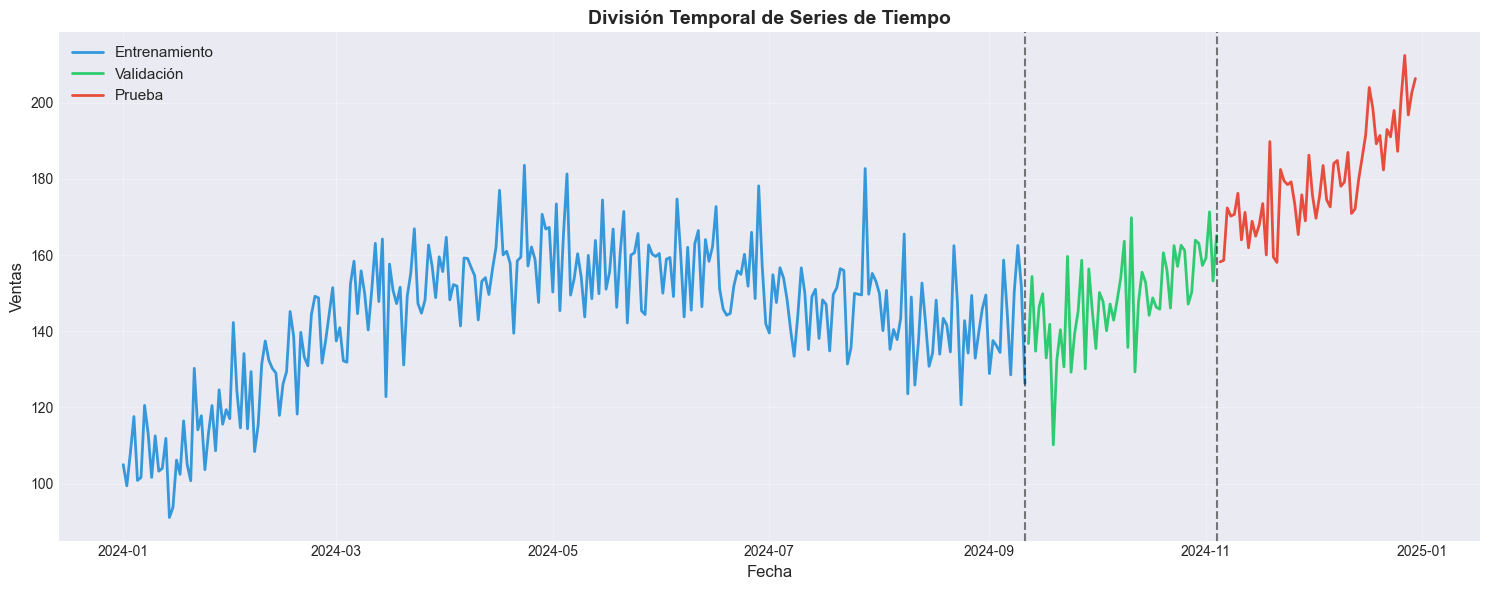


💡 Puntos clave para series temporales:
  ✓ Siempre respeta el orden temporal
  ✓ NO uses división aleatoria (shuffle=False)
  ✓ El conjunto de prueba debe ser el período más reciente
  ✓ Considera usar validación cruzada temporal (TimeSeriesSplit) para más robustez


In [8]:
print("="*60)
print("EJEMPLO 4: Series Temporales")
print("="*60)

# Creamos datos temporales simulados (ej: ventas diarias)
np.random.seed(42)
n_dias = 365
fechas = pd.date_range('2024-01-01', periods=n_dias, freq='D')

# Simulamos ventas con tendencia y estacionalidad
tendencia = np.linspace(100, 200, n_dias)  # Tendencia creciente
estacionalidad = 30 * np.sin(2 * np.pi * np.arange(n_dias) / 365)  # Patrón anual
ruido = np.random.normal(0, 10, n_dias)
ventas = tendencia + estacionalidad + ruido

df_ventas = pd.DataFrame({
    'fecha': fechas,
    'ventas': ventas
})

print(f"\nDatos de ventas creados: {len(df_ventas)} días")
print(f"Período: {df_ventas['fecha'].min()} a {df_ventas['fecha'].max()}")

# División temporal (70-15-15 aproximadamente)
train_size = int(0.70 * len(df_ventas))  # Primeros 70%
val_size = int(0.15 * len(df_ventas))    # Siguientes 15%

df_train = df_ventas.iloc[:train_size]
df_val = df_ventas.iloc[train_size:train_size + val_size]
df_test = df_ventas.iloc[train_size + val_size:]

print(f"\n📅 División temporal:")
print(f"\nEntrenamiento:")
print(f"  Período: {df_train['fecha'].min().date()} a {df_train['fecha'].max().date()}")
print(f"  Días: {len(df_train)}")

print(f"\nValidación:")
print(f"  Período: {df_val['fecha'].min().date()} a {df_val['fecha'].max().date()}")
print(f"  Días: {len(df_val)}")

print(f"\nPrueba:")
print(f"  Período: {df_test['fecha'].min().date()} a {df_test['fecha'].max().date()}")
print(f"  Días: {len(df_test)}")

# Visualización
fig, ax = plt.subplots(figsize=(15, 6))

# Graficamos cada conjunto con color diferente
ax.plot(df_train['fecha'], df_train['ventas'], color='#3498db', linewidth=2, label='Entrenamiento')
ax.plot(df_val['fecha'], df_val['ventas'], color='#2ecc71', linewidth=2, label='Validación')
ax.plot(df_test['fecha'], df_test['ventas'], color='#e74c3c', linewidth=2, label='Prueba')

# Líneas verticales para marcar las divisiones
ax.axvline(x=df_train['fecha'].max(), color='black', linestyle='--', alpha=0.5)
ax.axvline(x=df_val['fecha'].max(), color='black', linestyle='--', alpha=0.5)

ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel('Ventas', fontsize=12)
ax.set_title('División Temporal de Series de Tiempo', fontsize=14, weight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Puntos clave para series temporales:")
print("  ✓ Siempre respeta el orden temporal")
print("  ✓ NO uses división aleatoria (shuffle=False)")
print("  ✓ El conjunto de prueba debe ser el período más reciente")
print("  ✓ Considera usar validación cruzada temporal (TimeSeriesSplit) para más robustez")

---
## 5. Casos Especiales y Mejores Prácticas

Ahora que entendemos lo básico, veamos algunos casos especiales y mejores prácticas que te harán un profesional en esto.

### 🔬 Validación Cruzada (Cross-Validation)

Hasta ahora hemos hecho divisiones estáticas: una vez divides, esa es tu división final. Pero ¿qué pasa si tuviste mala suerte y tu conjunto de validación resultó muy fácil o muy difícil?

**Validación cruzada** resuelve esto dividiendo los datos en múltiples "pliegues" (folds) y entrenando múltiples veces.

**K-Fold Cross Validation**:
1. Divides tus datos en K partes iguales (ej: 5 pliegues)
2. Entrenas K veces, cada vez usando un pliegue diferente como validación
3. Promedias los resultados

**Ventajas**:
- Uso más eficiente de los datos
- Resultados más confiables
- Detectas si tu modelo es estable o inconsistente

**Cuándo usar**:
- Cuando tienes pocos datos
- Cuando quieres evaluar la estabilidad del modelo
- Durante el desarrollo (NO es sustituto del conjunto de prueba final)

VALIDACIÓN CRUZADA (K-Fold)

Datos para cross-validation: 120 muestras
Datos de prueba (guardados): 30 muestras

Resultados de Cross-Validation (5 pliegues)

Logistic Regression:
  Scores por pliegue: ['0.917', '0.958', '0.958', '1.000', '0.958']
  Media: 0.958
  Desviación estándar: 0.026
  Rango: [0.917, 1.000]

Decision Tree (depth=3):
  Scores por pliegue: ['0.917', '0.833', '0.958', '1.000', '0.875']
  Media: 0.917
  Desviación estándar: 0.059
  Rango: [0.833, 1.000]

Decision Tree (depth=5):
  Scores por pliegue: ['0.917', '0.833', '0.917', '0.958', '0.917']
  Media: 0.908
  Desviación estándar: 0.041
  Rango: [0.833, 0.958]


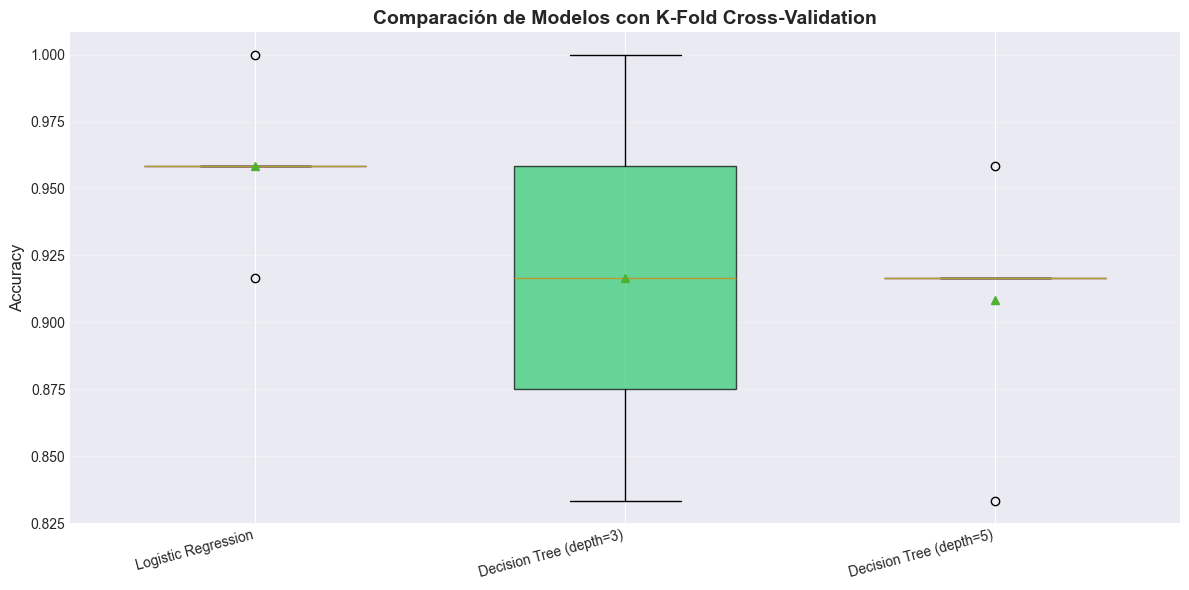


💡 Interpretación:
  - La línea verde dentro de cada caja es la mediana
  - El triángulo verde es la media
  - La altura de la caja muestra la variabilidad
  - Menos variabilidad = modelo más estable

🏆 Mejor modelo (según CV): Logistic Regression

✅ EVALUACIÓN FINAL EN TEST:
  Precisión en prueba: 96.67%


In [9]:
from sklearn.model_selection import cross_val_score, KFold

print("="*60)
print("VALIDACIÓN CRUZADA (K-Fold)")
print("="*60)

# Usamos el dataset Iris
X = df_iris.drop(['species', 'species_name'], axis=1)
y = df_iris['species']

# Primero separamos test (que NO usaremos en cross-validation)
X_temp, X_test_cv, y_temp, y_test_cv = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nDatos para cross-validation: {len(X_temp)} muestras")
print(f"Datos de prueba (guardados): {len(X_test_cv)} muestras")

# Configuramos K-Fold con 5 pliegues
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Entrenamos con diferentes modelos y comparamos
modelos = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Decision Tree (depth=3)': DecisionTreeClassifier(max_depth=3, random_state=42),
    'Decision Tree (depth=5)': DecisionTreeClassifier(max_depth=5, random_state=42),
}

print("\n" + "="*60)
print("Resultados de Cross-Validation (5 pliegues)")
print("="*60)

resultados_cv = {}

for nombre, modelo in modelos.items():
    # cross_val_score hace todo el trabajo por nosotros:
    # - Divide los datos en K pliegues
    # - Entrena K veces
    # - Retorna las K puntuaciones
    scores = cross_val_score(modelo, X_temp, y_temp, cv=kfold, scoring='accuracy')
    
    resultados_cv[nombre] = scores
    
    print(f"\n{nombre}:")
    print(f"  Scores por pliegue: {[f'{s:.3f}' for s in scores]}")
    print(f"  Media: {scores.mean():.3f}")
    print(f"  Desviación estándar: {scores.std():.3f}")
    print(f"  Rango: [{scores.min():.3f}, {scores.max():.3f}]")

# Visualización de resultados
fig, ax = plt.subplots(figsize=(12, 6))

positions = np.arange(len(modelos))
for i, (nombre, scores) in enumerate(resultados_cv.items()):
    # Box plot para cada modelo
    bp = ax.boxplot([scores], positions=[i], widths=0.6, 
                     patch_artist=True, showmeans=True)
    bp['boxes'][0].set_facecolor(['#3498db', '#2ecc71', '#e74c3c'][i])
    bp['boxes'][0].set_alpha(0.7)

ax.set_xticks(positions)
ax.set_xticklabels(modelos.keys(), rotation=15, ha='right')
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Comparación de Modelos con K-Fold Cross-Validation', fontsize=14, weight='bold')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n💡 Interpretación:")
print("  - La línea verde dentro de cada caja es la mediana")
print("  - El triángulo verde es la media")
print("  - La altura de la caja muestra la variabilidad")
print("  - Menos variabilidad = modelo más estable")

# Seleccionamos el mejor modelo basado en CV
mejor_modelo_nombre = max(resultados_cv.items(), key=lambda x: x[1].mean())[0]
print(f"\n🏆 Mejor modelo (según CV): {mejor_modelo_nombre}")

# Ahora entrenamos el mejor modelo con TODOS los datos de temp
# y evaluamos en test (solo una vez)
mejor_modelo = modelos[mejor_modelo_nombre]
mejor_modelo.fit(X_temp, y_temp)
test_accuracy_cv = mejor_modelo.score(X_test_cv, y_test_cv)

print(f"\n✅ EVALUACIÓN FINAL EN TEST:")
print(f"  Precisión en prueba: {test_accuracy_cv*100:.2f}%")

---
## 6. Errores Comunes y Cómo Evitarlos

Vamos a ver los errores más comunes que cometen hasta los programadores experimentados, y cómo evitarlos.

### ❌ Error 1: Data Leakage - El más peligroso

**Data leakage** ocurre cuando información del conjunto de validación o prueba "se filtra" hacia el entrenamiento. Esto hace que tu modelo parezca mucho mejor de lo que realmente es.

**Ejemplos comunes de data leakage**:

1. **Normalizar antes de dividir**: Si calculas la media y desviación estándar de TODO el dataset y luego divides, estás usando información de test en train.

2. **Feature engineering con todo el dataset**: Si creas características basándote en estadísticas del dataset completo.

3. **Imputar valores faltantes antes de dividir**: Si rellenas NaN con la media del dataset completo.

4. **Selección de características con todo el dataset**: Si eliminas características poco importantes basándote en análisis del dataset completo.

**La regla de oro**: TODO lo que aprenda del dataset (estadísticas, transformaciones, selección) debe hacerse SOLO con datos de entrenamiento, y luego aplicarse a validación y prueba.

In [10]:
print("="*60)
print("DEMOSTRACIÓN: Data Leakage")
print("="*60)

# Creamos un dataset con diferentes escalas
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target

print(f"Dataset diabetes cargado: {X_diabetes.shape}")
print(f"\nEstadísticas originales (primera característica):")
print(f"  Media: {X_diabetes[:, 0].mean():.3f}")
print(f"  Std: {X_diabetes[:, 0].std():.3f}")

# ❌ FORMA INCORRECTA - Data Leakage
print("\n" + "="*60)
print("❌ INCORRECTO: Normalizar ANTES de dividir")
print("="*60)

# Normalizamos TODO el dataset
scaler_bad = StandardScaler()
X_scaled_bad = scaler_bad.fit_transform(X_diabetes)  # ¡Usando TODO el dataset!

# Ahora dividimos
X_train_bad, X_test_bad, y_train_bad, y_test_bad = train_test_split(
    X_scaled_bad, y_diabetes, test_size=0.2, random_state=42
)

# Entrenamos
modelo_bad = LinearRegression()
modelo_bad.fit(X_train_bad, y_train_bad)

# Evaluamos
pred_train_bad = modelo_bad.predict(X_train_bad)
pred_test_bad = modelo_bad.predict(X_test_bad)
mse_train_bad = mean_squared_error(y_train_bad, pred_train_bad)
mse_test_bad = mean_squared_error(y_test_bad, pred_test_bad)

print(f"\nResultados:")
print(f"  MSE Entrenamiento: {mse_train_bad:.2f}")
print(f"  MSE Prueba: {mse_test_bad:.2f}")
print(f"\n⚠️ Problema: Usamos información de test para calcular media y std")
print(f"   El modelo tiene una ventaja injusta.")

# ✅ FORMA CORRECTA - Sin Data Leakage
print("\n" + "="*60)
print("✅ CORRECTO: Normalizar DESPUÉS de dividir")
print("="*60)

# Primero dividimos
X_train_good, X_test_good, y_train_good, y_test_good = train_test_split(
    X_diabetes, y_diabetes, test_size=0.2, random_state=42
)

# Normalizamos usando SOLO datos de entrenamiento
scaler_good = StandardScaler()
X_train_scaled = scaler_good.fit_transform(X_train_good)  # fit_transform en train
X_test_scaled = scaler_good.transform(X_test_good)  # solo transform en test

print(f"\nEstadísticas del scaler (calculadas solo con train):")
print(f"  Media aprendida: {scaler_good.mean_[0]:.3f}")
print(f"  Std aprendida: {scaler_good.scale_[0]:.3f}")

# Entrenamos
modelo_good = LinearRegression()
modelo_good.fit(X_train_scaled, y_train_good)

# Evaluamos
pred_train_good = modelo_good.predict(X_train_scaled)
pred_test_good = modelo_good.predict(X_test_scaled)
mse_train_good = mean_squared_error(y_train_good, pred_train_good)
mse_test_good = mean_squared_error(y_test_good, pred_test_good)

print(f"\nResultados:")
print(f"  MSE Entrenamiento: {mse_train_good:.2f}")
print(f"  MSE Prueba: {mse_test_good:.2f}")
print(f"\n✅ Evaluación honesta: el modelo nunca vio información de test")

# Comparación
print("\n" + "="*60)
print("COMPARACIÓN")
print("="*60)
print(f"\nMétodo incorrecto:")
print(f"  MSE Test: {mse_test_bad:.2f}")
print(f"\nMétodo correcto:")
print(f"  MSE Test: {mse_test_good:.2f}")
print(f"\nDiferencia: {abs(mse_test_good - mse_test_bad):.2f}")
print(f"\n💡 En este caso la diferencia puede parecer pequeña, pero en")
print(f"   problemas del mundo real, data leakage puede hacer que un modelo")
print(f"   inútil parezca excelente.")

DEMOSTRACIÓN: Data Leakage
Dataset diabetes cargado: (442, 10)

Estadísticas originales (primera característica):
  Media: -0.000
  Std: 0.048

❌ INCORRECTO: Normalizar ANTES de dividir

Resultados:
  MSE Entrenamiento: 2868.55
  MSE Prueba: 2900.19

⚠️ Problema: Usamos información de test para calcular media y std
   El modelo tiene una ventaja injusta.

✅ CORRECTO: Normalizar DESPUÉS de dividir

Estadísticas del scaler (calculadas solo con train):
  Media aprendida: 0.001
  Std aprendida: 0.046

Resultados:
  MSE Entrenamiento: 2868.55
  MSE Prueba: 2900.19

✅ Evaluación honesta: el modelo nunca vio información de test

COMPARACIÓN

Método incorrecto:
  MSE Test: 2900.19

Método correcto:
  MSE Test: 2900.19

Diferencia: 0.00

💡 En este caso la diferencia puede parecer pequeña, pero en
   problemas del mundo real, data leakage puede hacer que un modelo
   inútil parezca excelente.


### ❌ Error 2: Usar el conjunto de prueba más de una vez

Cada vez que miras los resultados en el conjunto de prueba y ajustas algo en tu modelo, estás usando indirectamente esa información. El conjunto de prueba deja de ser imparcial.

**Escenario común**:
1. Entrenas modelo v1 → Evalúas en test → 75% accuracy
2. "Hmm, voy a probar con más capas" → Entrenas v2 → Test: 78%
3. "Mejor, voy a añadir dropout" → Entrenas v3 → Test: 76%
4. "Ok, v2 era mejor" → Reportas 78%

**Problema**: ¡Has usado test 3 veces! Tu 78% ya no es una evaluación imparcial.

**Solución**: Usa validación para todas esas decisiones. Test solo se usa UNA VEZ al final.

### ❌ Error 3: No mantener las proporciones en datos desbalanceados

Ya vimos esto con la división estratificada. Si tus clases están desbalanceadas, SIEMPRE usa `stratify=y` en `train_test_split`.

### ❌ Error 4: No fijar random_state

Si no fijas `random_state`, cada vez que ejecutes tu código obtendrás diferentes divisiones y diferentes resultados. Esto hace que tu trabajo no sea reproducible.

**Siempre usa**: `train_test_split(..., random_state=42)`  # o cualquier número que prefieras

---
## 📋 Resumen y Checklist

### Lo esencial que tus compañeros deben recordar:

**1. Los tres conjuntos tienen roles diferentes**:
- **Entrenamiento**: El modelo aprende aquí (usa muchas veces)
- **Validación**: Ajustamos hiperparámetros aquí (usa muchas veces)
- **Prueba**: Evaluamos el rendimiento final aquí (usa UNA vez)

**2. El flujo correcto**:
1. EDA inicial con todos los datos
2. Dividir datos (train/val/test)
3. EDA detallado solo en train
4. Preprocesamiento basado solo en train
5. Entrenar modelos
6. Ajustar con validación
7. Evaluar en test (solo una vez)

**3. Proporciones típicas**:
- Mucha data (>10,000): 80-10-10
- Data moderada (1,000-10,000): 70-15-15
- Poca data (<1,000): 60-20-20 o usar cross-validation

**4. Casos especiales**:
- Clases desbalanceadas → usar `stratify=y`
- Series temporales → división temporal, NO aleatoria
- Pocos datos → considerar K-Fold cross-validation

**5. Evitar data leakage**:
- TODO preprocesamiento DESPUÉS de dividir
- Calcular estadísticas SOLO con train
- Aplicar transformaciones aprendidas a val/test

In [11]:
# Plantilla completa para usar en tus proyectos
def division_datos_completa(X, y, test_size=0.15, val_size=0.15, 
                            stratify=False, temporal=False, random_state=42):
    """
    Función completa para dividir datos correctamente.
    
    Parámetros:
    -----------
    X : array-like
        Características
    y : array-like
        Etiquetas
    test_size : float
        Proporción para conjunto de prueba
    val_size : float
        Proporción para conjunto de validación
    stratify : bool
        Si True, mantiene proporciones de clases
    temporal : bool
        Si True, hace división temporal (para series de tiempo)
    random_state : int
        Semilla para reproducibilidad
    
    Retorna:
    --------
    X_train, X_val, X_test, y_train, y_val, y_test
    """
    
    if temporal:
        # División temporal
        n = len(X)
        train_end = int(n * (1 - test_size - val_size))
        val_end = int(n * (1 - test_size))
        
        X_train = X[:train_end]
        X_val = X[train_end:val_end]
        X_test = X[val_end:]
        
        y_train = y[:train_end]
        y_val = y[train_end:val_end]
        y_test = y[val_end:]
        
    else:
        # División aleatoria
        stratify_param = y if stratify else None
        
        # Primera división: separar test
        X_temp, X_test, y_temp, y_test = train_test_split(
            X, y,
            test_size=test_size,
            stratify=stratify_param,
            random_state=random_state
        )
        
        # Segunda división: separar val de train
        val_size_adjusted = val_size / (1 - test_size)
        stratify_temp = y_temp if stratify else None
        
        X_train, X_val, y_train, y_val = train_test_split(
            X_temp, y_temp,
            test_size=val_size_adjusted,
            stratify=stratify_temp,
            random_state=random_state
        )
    
    # Imprimimos resumen
    print("="*60)
    print("DIVISIÓN DE DATOS COMPLETADA")
    print("="*60)
    print(f"\nTotal de muestras: {len(X)}")
    print(f"\n🎯 Entrenamiento: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
    print(f"🔍 Validación: {len(X_val)} ({len(X_val)/len(X)*100:.1f}%)")
    print(f"✅ Prueba: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")
    
    if stratify:
        print(f"\n📊 División estratificada aplicada")
    if temporal:
        print(f"\n📅 División temporal aplicada")
    
    return X_train, X_val, X_test, y_train, y_val, y_test

# Ejemplo de uso
print("\nEjemplo de uso de la función:")
print("-" * 60)

X = df_iris.drop(['species', 'species_name'], axis=1).values
y = df_iris['species'].values

X_train, X_val, X_test, y_train, y_val, y_test = division_datos_completa(
    X, y,
    test_size=0.15,
    val_size=0.15,
    stratify=True,  # Usamos estratificación
    temporal=False,
    random_state=42
)

print("\n💾 Puedes copiar esta función y usarla en todos tus proyectos.")


Ejemplo de uso de la función:
------------------------------------------------------------
DIVISIÓN DE DATOS COMPLETADA

Total de muestras: 150

🎯 Entrenamiento: 104 (69.3%)
🔍 Validación: 23 (15.3%)
✅ Prueba: 23 (15.3%)

📊 División estratificada aplicada

💾 Puedes copiar esta función y usarla en todos tus proyectos.


---
## 🎯 Preguntas probables

### P1: "¿Por qué no simplemente usar 80-20 y ya?"
**R**: Porque necesitas validación para ajustar hiperparámetros. Si solo tienes train/test, terminarás usando test para ajustar, lo que contamina la evaluación.

### P2: "¿Qué pasa si mi dataset es muy pequeño (ej: 100 muestras)?"
**R**: Con pocos datos, considera:
- Usar K-Fold cross-validation en lugar de división estática
- Aumentar la proporción de entrenamiento (ej: 70-15-15)
- Si tienes MUY pocos datos (<50), tal vez ML no es la mejor solución

### P3: "¿Puedo combinar train y validation después de elegir el mejor modelo?"
**R**: ¡Sí! Es una buena práctica. Una vez que elegiste tu modelo final con validación, puedes reentrenarlo con train+val para que aprenda de más datos. PERO el test sigue siendo sagrado.

### P4: "¿Qué hago si mi modelo tiene 95% en train pero 60% en validación?"
**R**: Eso es overfitting clásico. Soluciones:
- Simplifica el modelo (menos capas, menos profundidad)
- Añade regularización (dropout, L1/L2)
- Consigue más datos
- Añade data augmentation

### P5: "¿Cuándo debo usar división estratificada?"
**R**: Siempre que:
- Tus clases estén desbalanceadas (ej: 90%-10%)
- Tengas pocas muestras de alguna clase
- En clasificación multiclase

### P6: "¿Es malo si miro el conjunto de test una vez durante el desarrollo?"
**R**: Sí, porque aunque sea "solo para ver", si esa información influye en CUALQUIER decisión que tomes sobre el modelo, ya no es imparcial.

### P7: "¿Qué es mejor: 70-15-15 o 80-10-10?"
**R**: Depende del tamaño de tus datos:
- Con <1000 muestras: prefiere 60-20-20 o 70-15-15
- Con 1000-10000: usa 70-15-15
- Con >10000: puedes usar 80-10-10 o incluso 90-5-5

### P8: "¿Cross-validation reemplaza la necesidad de un conjunto de test?"
**R**: ¡NO! Cross-validation es para desarrollo y selección de modelos. Siempre necesitas un conjunto de test final que nunca haya participado en ninguna decisión.

---
## 🎓 Conclusión

La división de datos es fundamental en Machine Learning porque:

1. **Previene el sobreajuste**: Nos asegura que el modelo generaliza y no solo memoriza.

2. **Permite evaluación honesta**: Sabemos cómo funcionará el modelo con datos nuevos.

3. **Guía el desarrollo**: Validación nos ayuda a tomar decisiones informadas.

4. **Evita data leakage**: Mantiene la integridad del proceso de evaluación.

**Recuerda el mantra**: 
- Train es para aprender
- Validation es para ajustar
- Test es para evaluar (¡una sola vez!)

**Para tu presentación**, enfócate en:
- La analogía de estudiar para un examen (es muy clara)
- Ejemplos visuales (los gráficos ayudan mucho)
- Errores comunes (data leakage es el más importante)
- Casos especiales (estratificación y series temporales)

